In [89]:
import glob
import math
import os
import random
import json
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from datetime import datetime as dt
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger, LearningRateScheduler
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
#from losses import categorical_focal_loss

from tensorflow.keras.applications.densenet import preprocess_input
import tensorflow as tf
print("TF Version:", tf.__version__)

TF Version: 1.15.0


In [90]:
train_dir = '/Users/aravindagayan/Documents/Projects/DataSets/Cat_Dog_data/train'
test_dir = '/Users/aravindagayan/Documents/Projects/DataSets/Cat_Dog_data/test'

#model_json = 
#model_weight = 

WIDTH = 300
HEIGHT = 400
BATCH = 4

### Check Images

In [75]:
import pygal 
from IPython.display import display, HTML

#Create function to display interactive plotting
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))
    
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Class Distribution'
for o in os.listdir(train_dir):
    if not o.startswith('.'):
        line_chart.add(o, len(os.listdir(os.path.join(train_dir, o))))
galplot(line_chart)

Text(0.5, 1.0, 'dog')

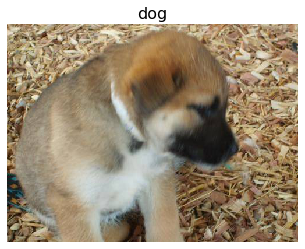

In [80]:
file_list = glob.glob(os.path.join(train_dir,'*','*'))
img_path = random.choice(file_list)
img = load_img(img_path)
car_class = img_path.split("/")[-2]
plt.imshow(img)
plt.axis("off")
plt.title(car_class, fontsize=16)

### Checking for corrupted Files

In [106]:
from os import listdir
from PIL import Image

file_list = [i for i in glob.glob(os.path.join(train_dir,'*','*')) if i.split('/')[-1].split('.')[-1].lower() in ['jpg','png','jpeg']]
   
for filename in file_list:
    try:
        img = Image.open(filename) # open the image file
        img.verify() # verify that it is, in fact an image
    except (IOError, SyntaxError) as e:
        print('Bad file: ', filename) # print out the names of corrupt files
print('Checked '+ str(len(file_list))+' Images')

Checked 22500 Images


### Image Iterator

In [52]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

train_flow = train_datagen.flow_from_directory(
    train_dir,
    target_size=(WIDTH, HEIGHT),
    batch_size = BATCH,
    subset='training',
    shuffle=True)

val_flow = train_datagen.flow_from_directory(
    test_dir,
    target_size=(WIDTH, HEIGHT),
    batch_size = BATCH,
    subset='validation',
    shuffle=False)

Found 18000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
